<a href="https://colab.research.google.com/github/syedabusafwan/syedabusafwan/blob/practice/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import glob
import math # imports the math module

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [4]:
!kaggle datasets download -d preetviradiya/brian-tumor-dataset

Dataset URL: https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset
License(s): GPL-2.0
 98% 105M/107M [00:06<00:00, 21.5MB/s]
100% 107M/107M [00:06<00:00, 16.9MB/s]


In [5]:
!unzip '/content/brian-tumor-dataset.zip' -d '/content'

Archive:  /content/brian-tumor-dataset.zip
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: /content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
ROOT_DIR = "/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

In [8]:
len(os.listdir("/content/Brain Tumor Data Set/Brain Tumor Data Set"))

2

# We Will Split the Data such that
* 70% for Train data
* 15% for Validation
* 15% for Testing

In [9]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)

    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size= (math.floor(70/100*number_of_images[dir])- 5),
                                replace=False):
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join("./train", dir)
      shutil.copy(O,D)
      os.remove(O)
    else:
      print("Train Folder Exsist")


Train Folder Exsist
Train Folder Exsist


In [10]:
def dataFolder(p, split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size= (math.floor(split*number_of_images[dir])- 5),
                                replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
      print("Train Folder Exsist")



In [11]:
dataFolder("train", 0.7)

Train Folder Exsist


In [12]:
dataFolder("val", 0.15)

In [13]:
dataFolder("test", 0.15)

In [14]:
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Brain Tumor', 17), ('Healthy', 16)])

# MOdel Build

In [15]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator is now part of tensorflow.keras.preprocessing.image
import keras

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator is now part of tensorflow.keras.preprocessing.image

In [17]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [19]:
def preprocessingImages1(path):
  """
  input : path
  output : Pre processed image
  """

  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255,horizontal_flip= True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')


  return image

In [20]:
path = "/content/train"
train_data = preprocessingImages1(path)


Found 3209 images belonging to 2 classes.


In [21]:
def preprocessingImages2(path):
  """
  input : path
  output : Pre processed image
  """

  image_data = ImageDataGenerator( rescale=1/255,)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')


  return image

In [22]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [23]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [28]:
# Early Stoping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stoping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode='auto')

#Model Checek POint

mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.keras", verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

# Model Training

In [29]:
# Use model.fit() instead of model.fit_generator()
hs = model.fit(train_data, steps_per_epoch=8, epochs=30, verbose=1,
                     validation_data=val_data, validation_steps=16, callbacks=cd)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.6746 - loss: 0.5861
Epoch 1: val_accuracy improved from -inf to 0.81250, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 623ms/step - accuracy: 0.6804 - loss: 0.5837 - val_accuracy: 0.8125 - val_loss: 0.4697
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.7910 - loss: 0.4897
Epoch 2: val_accuracy did not improve from 0.81250
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.7886 - loss: 0.4939 - val_accuracy: 0.7545 - val_loss: 0.5630
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.7207 - loss: 0.5666
Epoch 3: val_accuracy improved from 0.81250 to 0.81836, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 884ms/step - accuracy: 0.7210 - loss: 0.5646 - val_accuracy: 0.8184 - val_loss: 0.4698
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.6727 - loss: 0.6059
Epoch 4: val_accuracy did not improve from 0.81836
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 953ms/step -

In [30]:
# Model Graphical Interpretation

h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

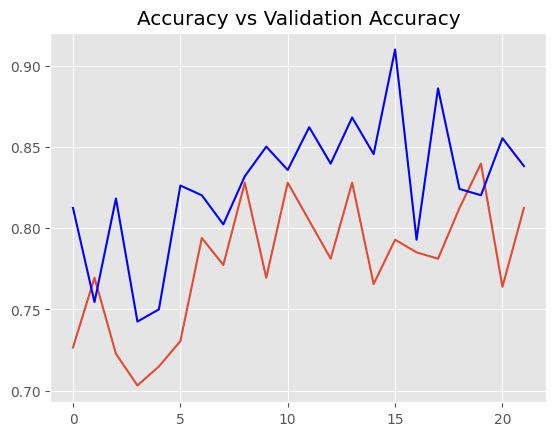

In [33]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "blue")
plt.title("Accuracy vs Validation Accuracy")
plt.show()

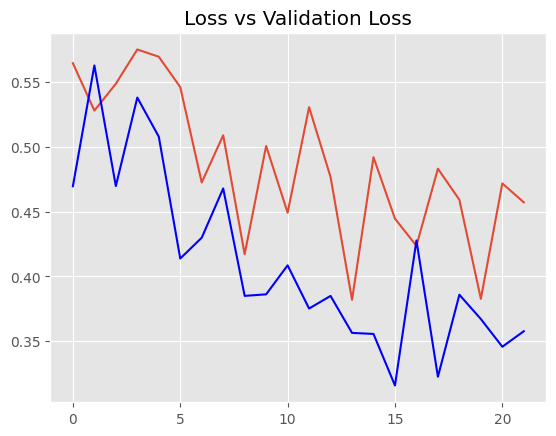

In [34]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "blue")
plt.title("Loss vs Validation Loss")
plt.show()

In [35]:
#Model Accuracy
from keras.models import load_model
model = load_model("/content/bestmodel.keras")

In [38]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is {acc*100}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8372 - loss: 0.3903
The accuracy of the model is 84.83063578605652%


In [40]:
from keras.preprocessing.image import load_img, img_to_array

In [45]:
path = "/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1127).jpg"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

input_arr.shape

input_arr = np.array([input_arr]) # Add an extra dimension for the batch

pred = model.predict(input_arr)[0][0]
pred

if pred < 0.5: # Check probability for binary classification
  print("The image is having a Tumor")
else:
  print("The image is not having a Tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
The image is having a Tumor
